In [ ]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/Creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(772, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

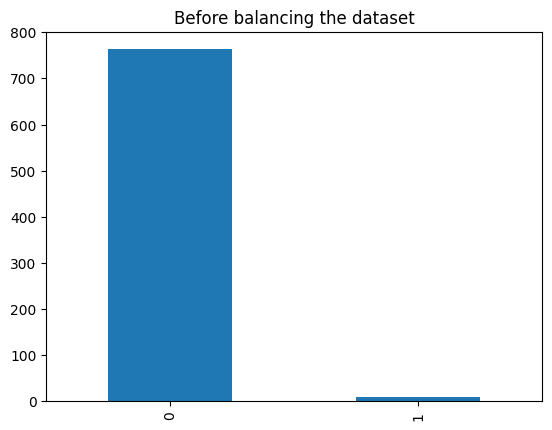

In [ ]:
data['Class'].value_counts().plot(kind='bar',title='Before balancing the dataset')
plt.show()

In [ ]:
X = data.drop('Class', axis = 1)
y = data['Class']

**OVERSAMPLING TECHNIQUE TO BALANCE THE DATASET**

SMOTE used

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_newsample,y_newsample=smote.fit_resample(X, y)
data_new=X_newsample.join(y_newsample)

In [ ]:
data_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,486,-0.878460,0.397434,1.708568,0.194206,0.936322,-0.904784,0.861199,-0.157809,-0.138563,...,0.058334,0.256356,-0.249211,0.384424,0.387257,-0.441406,-0.102580,-0.122207,1.006584,1
1522,559,0.905482,0.370130,0.538042,0.608781,-0.144404,-1.040654,0.220732,-0.201645,-0.010776,...,-0.229937,-0.643067,0.065520,0.349937,0.248515,0.006043,-0.035445,0.005691,1.243267,1
1523,52,1.220127,0.303871,0.227456,0.557976,-0.133428,-0.525258,-0.004568,-0.043987,-0.125152,...,-0.253489,-0.725651,0.113301,-0.035312,0.189037,0.111911,-0.015426,0.021973,2.690000,1
1524,88,0.424662,0.635254,-0.222435,1.225348,-0.067452,-0.376661,-0.617093,0.371163,-0.805994,...,-0.063099,-0.506513,-0.022743,-0.195334,0.140317,0.137268,0.050160,-0.019869,2.101043,1


In [ ]:
data_new['Class'].value_counts()

0    763
1    763
Name: Class, dtype: int64

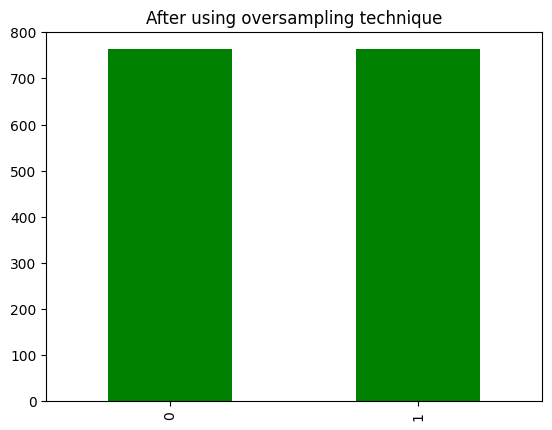

In [ ]:
data_new['Class'].value_counts().plot(kind='bar',color='green',title='After using oversampling technique')
plt.show()

**SAMPLE** **SIZE**

In [ ]:
import math
population_size = X_newsample.shape[0]
n = 1.96**2*0.5*0.5/0.05**2
n

384.1599999999999

**CREATING SAMPLES**

1.  SIMPLE RANDOM SAMPLING




In [ ]:
data_random_sample = data_new.sample(n=math.ceil(n), random_state=42 , replace=False)
data_random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1439,170,0.012856,0.586643,0.399484,0.213662,0.788755,0.208828,0.224290,0.171325,-0.190334,...,-0.112338,-0.373115,0.135348,-1.321159,-1.352639,0.078016,0.232497,0.220679,0.964836,1
76,49,-0.549626,0.418949,1.729833,0.203065,-0.187012,0.253878,0.500894,0.251256,-0.227985,...,0.115062,0.418529,-0.065133,0.264981,0.003958,0.395969,0.027182,0.043506,59.990000,0
1010,481,-1.343302,-0.299668,1.613028,0.596026,1.043606,-0.933158,0.770388,-0.139161,-0.167405,...,0.183205,0.311624,0.062737,0.252075,0.369268,-0.393304,-0.133561,-0.094061,104.634103,1
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.980000,0
1132,416,-2.285365,1.568670,-1.258460,3.751591,-0.264984,-1.252375,-2.500567,1.339659,-2.448700,...,0.509063,0.071001,-0.399445,0.218728,0.021779,0.236722,0.227896,-0.145671,0.129283,1


2. SYSTEMATIC RANDOM SAMPLING



In [ ]:
k = int((population_size)/math.ceil(n))
start = np.random.randint(0, k)
systematic_sample = data_new.iloc[start::k]
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
11,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
14,12,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0


3. CLUSTER SAMPLING

In [ ]:
def get_clustered_Sample(data, n_per_cluster, num_select_clusters):
    N = len(data)
    K = int(N/n_per_cluster)
    df = None
    for k in range(K):
        sample_k = data.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        data = data.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

data_cluster_sample = get_clustered_Sample(data = data_new, n_per_cluster = int(n), num_select_clusters = 1)
data_cluster_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
736,553,-2.618386,-2.302449,-0.386400,0.854628,-0.861209,2.036707,3.885511,-0.016542,-1.569959,...,-0.145438,2.002551,-1.419615,0.626973,0.878217,-0.377409,0.143628,986.310000,0,2.0
1242,554,-0.415316,0.190529,0.798360,-0.061644,0.356033,-0.634360,0.191881,-0.014352,0.019485,...,-0.469656,-0.089844,0.018938,-0.089421,0.175874,-0.202508,-0.200503,1.128074,1,2.0
101,68,-0.770196,0.483572,1.901072,-0.001876,0.024245,-1.171903,0.666483,-0.094603,-0.136666,...,-0.155801,0.018108,0.941555,-0.168582,0.056171,0.058979,0.134188,22.360000,0,2.0
356,261,1.260328,0.299161,0.527681,0.614899,-0.420592,-0.977533,0.108485,-0.244502,-0.058316,...,-0.688429,0.128290,0.398967,0.240282,0.092213,-0.024633,0.020529,1.980000,0,2.0
912,535,-1.824191,-0.779939,1.605350,-0.069546,1.424299,-0.002255,-0.508385,0.352284,0.329105,...,0.261332,-0.078982,-0.439951,-0.297227,0.443146,-0.273075,-0.314124,1.163384,1,2.0


4. BOOTSTRAP SAMPLING

In [ ]:
data_bootstrap_sample = data_new.sample(n = math.ceil(n), replace = True, random_state = 42)
data_bootstrap_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1126,427,-1.200176,-1.795824,1.934946,1.030169,1.765372,0.185024,-1.570038,0.544655,0.731720,...,0.247881,0.696772,0.256101,-0.562926,-0.112308,0.672613,-0.099724,-0.121408,1.792573,1
1459,130,0.930183,0.405465,0.343553,0.534201,-0.043167,-0.706957,0.144376,-0.108740,-0.008331,...,-0.243934,-0.708786,0.134385,-0.128777,-0.225221,0.089401,0.046765,0.085667,2.222730,1
860,175,0.106973,0.545767,0.447792,0.131237,0.789569,0.214195,0.290607,0.129609,-0.119163,...,-0.133227,-0.394335,0.150352,-1.315710,-1.343561,0.075949,0.224571,0.224539,0.998481,1
1294,474,-2.602615,-2.416230,1.224499,1.849694,1.277805,-1.030678,0.440929,-0.086302,-0.244100,...,0.537608,0.403358,1.035404,-0.152240,0.303000,-0.209661,-0.221858,0.002096,418.948422,1
1130,490,-1.090594,-0.040267,1.851140,0.327739,1.193010,-0.674435,0.426081,-0.013409,0.024699,...,0.120311,0.419873,-0.173749,0.197117,0.298621,-0.254619,-0.107505,-0.132629,1.075762,1


**MODEL EVALUATION**

**1. LOGISTIC REGRESSION**

1. Simple Random Sampling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
scaler=StandardScaler()
X_random_sample = data_random_sample.drop('Class', axis = 1)
y_random_sample = data_random_sample['Class']
X_random_scaled = scaler.fit_transform(X_random_sample)
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random_scaled, y_random_sample, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy for simple random sampling using LR:", accuracy)

Accuracy for simple random sampling using LR: 0.8706896551724138


2. Systematic Random Sampling

In [ ]:
X_systematic_sample = systematic_sample.drop('Class', axis = 1)
y_systematic_sample = systematic_sample['Class']
X_systematic_scaled = scaler.fit_transform(X_systematic_sample)
X_train_systematic, X_test_systematic, y_train_systematic, y_test_systematic = train_test_split(X_systematic_scaled, y_systematic_sample, test_size=0.3, random_state=42)

model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy for simplifed random sampling using LR:", accuracy)

Accuracy for simplifed random sampling using LR: 0.8954248366013072


3. Cluster Sampling

In [ ]:
X_cluster_sample = data_cluster_sample.drop('Class', axis = 1)
y_cluster_sample = data_cluster_sample['Class']
X_cluster_scaled = scaler.fit_transform(X_cluster_sample)
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster_scaled, y_cluster_sample, test_size=0.3, random_state=42)

model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)

accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy for cluster sampling using LR :", accuracy)

Accuracy for cluster sampling using LR : 0.9310344827586207


4. Bootstrap Sampling

In [ ]:
X_bootstrap_sample = data_bootstrap_sample.drop('Class', axis = 1)
y_bootstrap_sample = data_bootstrap_sample['Class']
X_bootstrap_scaled = scaler.fit_transform(X_bootstrap_sample)
X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(X_bootstrap_scaled, y_bootstrap_sample, test_size=0.3, random_state=42)

model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)

accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy for bootstrap sampling using LR :", accuracy)

Accuracy for bootstrap sampling using LR : 0.9568965517241379


**2. SVC SUPPORT VECTOR CLASSIFIER**

1. Simple Random Sampling

In [ ]:
from sklearn import svm
model= svm.SVC()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using SVC:", accuracy)

Accuracy of Simple Random Sampling using SVC: 0.9310344827586207


2. Systematic Random Sampling

In [ ]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using SVC:", accuracy)

Accuracy of Systematic Random Sampling using SVC: 0.9411764705882353


3. Cluster Sampling

In [ ]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using SVC:", accuracy)

Accuracy of Cluster Sampling using SVC: 0.9741379310344828


4. Bootstrap Sampling

In [ ]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using SVC:", accuracy)

Accuracy of Bootstrap Sampling using SVC: 0.9568965517241379


**3. XGBOOST CLASSIFIER**

1. Simple Random Sampling

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using xgb:", accuracy)

Accuracy of Simple Random Sampling using xgb: 0.9482758620689655


2. Systematic Random Sampling

In [ ]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using xgb:", accuracy)

Accuracy of Systematic Random Sampling using xgb: 0.9738562091503268


3. Cluster Sampling

In [ ]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using xgb:", accuracy)

Accuracy of Cluster Sampling using xgb: 0.9913793103448276


4. Bootstrap Sampling

In [ ]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using xgb:", accuracy)

Accuracy of Bootstrap Sampling using xgb: 0.9655172413793104


**4. RANDOM FOREST**

1. Simple Random Sampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using RF:", accuracy)

Accuracy of Simple Random Sampling using RF: 0.9913793103448276


2. Sytematic Random Sampling

In [ ]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using RF:", accuracy)

Accuracy of Systematic Random Sampling using RF: 0.9738562091503268


3. Cluster Sampling

In [ ]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using RF:", accuracy)

Accuracy of Cluster Sampling using RF: 1.0


4. Bootstrap Sampling

In [ ]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using RF:", accuracy)

Accuracy of Bootstrap Sampling using RF: 1.0




**5. GAUSSIAN NAIVE BAYES**

1. Simple Random Sampling

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using NB:", accuracy)

Accuracy of Simple Random Sampling using NB: 0.7844827586206896


2. Systematic Random Sampling

In [ ]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using NB:", accuracy)

Accuracy of Systematic Random Sampling using NB: 0.8104575163398693


3. Cluster Sampling

In [ ]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using NB:", accuracy)

Accuracy of Cluster Sampling using NB: 0.8362068965517241


4. Bootstrap Sampling

In [ ]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using NB:", accuracy)

Accuracy of Bootstrap Sampling using NB: 0.8706896551724138
